In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import pandas as pd 

In [2]:
csv_data = pd.read_csv("./original data/Sea Level Rise_2050_02p_258r_shp_selection_final_elim50k_unionFEMA.csv")
geojson_data = gpd.read_file("./original data/Sea Level Rise Maps (2050s 500-year Floodplain).geojson")
# print(geojson_data.head())

In [28]:
geojson_data.head(3)

,fld_zone,shape_area,join_count,gridcode,shape_leng,static_bfe,abfe_0_2pc,geometry
0,,0.0,0,1500,0.0,0.0,0,"MULTIPOLYGON (((-73.90993 40.91517, -73.9101 4..."
1,,0.0,0,1300,0.0,0.0,0,"MULTIPOLYGON (((-73.88825 40.89957, -73.88801 ..."
2,,0.0,0,1300,0.0,0.0,0,"MULTIPOLYGON (((-73.88852 40.89902, -73.88846 ..."


In [21]:
csv_data.head(3)

,the_geom,GRIDCODE,Join_Count,FLD_ZONE,STATIC_BFE,ABFE_0_2Pc,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.90992918342556 40.91516572...,1500,0,nan,0,0,0.0,0.0
1,MULTIPOLYGON (((-73.88824661909848 40.89957072...,1300,0,nan,0,0,0.0,0.0
2,MULTIPOLYGON (((-73.88851883563095 40.89902205...,1300,0,nan,0,0,0.0,0.0


In [4]:
csv_data['FLD_ZONE'] = csv_data['FLD_ZONE'].astype(str)

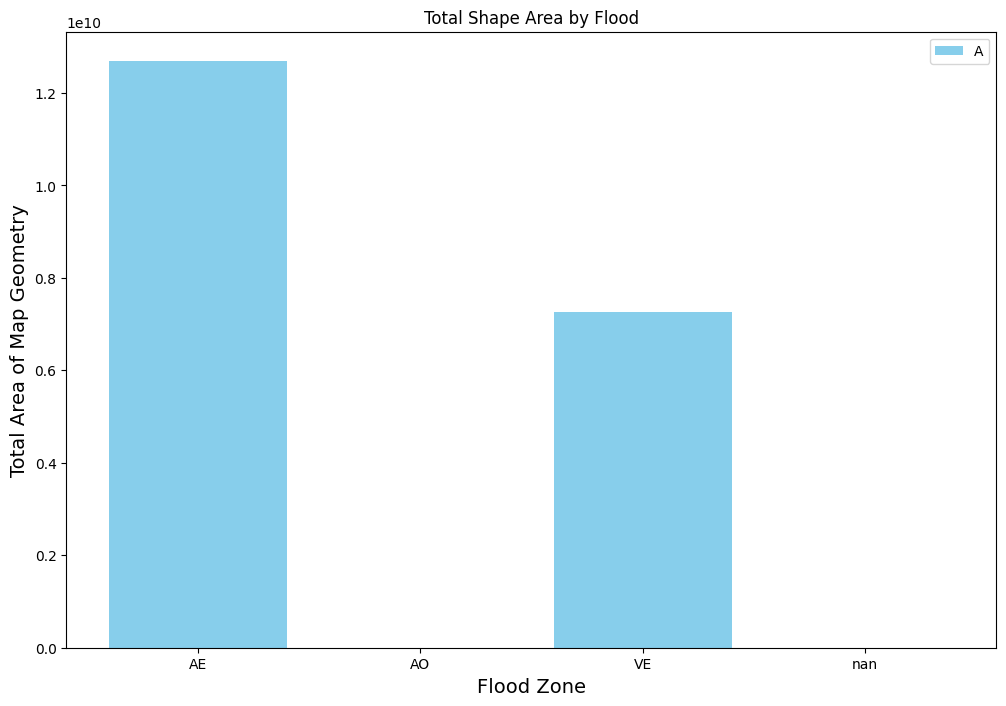

In [27]:
aggregated_data = csv_data.groupby('FLD_ZONE')['Shape_Area'].sum().reset_index()

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(aggregated_data['FLD_ZONE'], aggregated_data['Shape_Area'], color='skyblue')

# Customize the plot
ax.set_xlabel('Flood Zone', fontsize=14)
ax.set_ylabel('Total Area of Map Geometry', fontsize=14)
ax.set_title('Total Shape Area by Flood')
plt.legend('AE = 1% annual chance of flooding/100-year flood/< 3ft, AO = shallow flooding with average depths of 1 - 3 feet, VE = Coastal High Hazard Area')

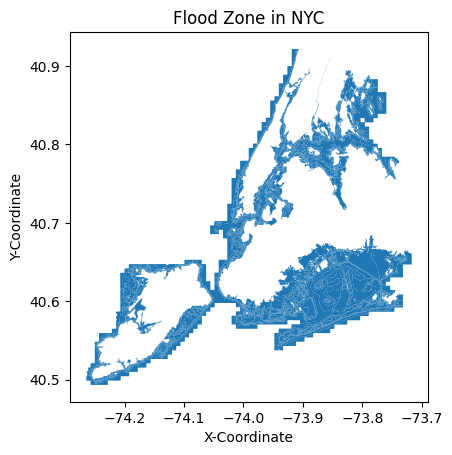

In [6]:
geojson_data.plot()
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Flood Zone in NYC')

plt.show()


In [7]:
flooddata = pd.read_csv("./original data/New_York_City_s_Flood_Vulnerability_Index_20240717.csv")

In [8]:
flooddata.head(3)

,the_geom,GEOID,FSHRI,FVI_storm_surge_present,FVI_storm_surge_2050s,FVI_storm_surge_2080s,FVI_tidal_2020s,FVI_tidal_2050s,FVI_tidal_2080s
0,"MULTIPOLYGON (((-73.860344 40.83329400000001, ...",36005009200,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"MULTIPOLYGON (((-73.873954 40.83423700000001, ...",36005006400,5.0,NaN,NaN,5.0,NaN,NaN,NaN
2,"MULTIPOLYGON (((-73.888319 40.84517900000001, ...",36005036501,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from shapely import wkt

flooddata["the_geom"] = flooddata["the_geom"].apply(wkt.loads)

gdf = gpd.GeoDataFrame(flooddata, geometry='the_geom')

In [11]:
gdf.set_crs(epsg=4326, inplace=True)

,the_geom,GEOID,FSHRI,FVI_storm_surge_present,FVI_storm_surge_2050s,FVI_storm_surge_2080s,FVI_tidal_2020s,FVI_tidal_2050s,FVI_tidal_2080s
0,"MULTIPOLYGON (((-73.86034 40.83329, -73.85906 ...",36005009200,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"MULTIPOLYGON (((-73.87395 40.83424, -73.8738 4...",36005006400,5.0,NaN,NaN,5.0,NaN,NaN,NaN
2,"MULTIPOLYGON (((-73.88832 40.84518, -73.88776 ...",36005036501,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"MULTIPOLYGON (((-73.90822 40.8162, -73.90759 4...",36005007900,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"MULTIPOLYGON (((-73.92096 40.85511, -73.92 40....",36005024700,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2204,"MULTIPOLYGON (((-73.94651 40.61949, -73.94552 ...",36047074600,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2205,"MULTIPOLYGON (((-73.91519 40.64286, -73.91444 ...",36047095800,4.0,NaN,NaN,2.0,NaN,NaN,NaN
2206,"MULTIPOLYGON (((-73.85351 40.72536, -73.85245 ...",36081071305,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2207,"MULTIPOLYGON (((-73.79605 40.75005, -73.79472 ...",36081141700,5.0,NaN,NaN,NaN,NaN,NaN,NaN


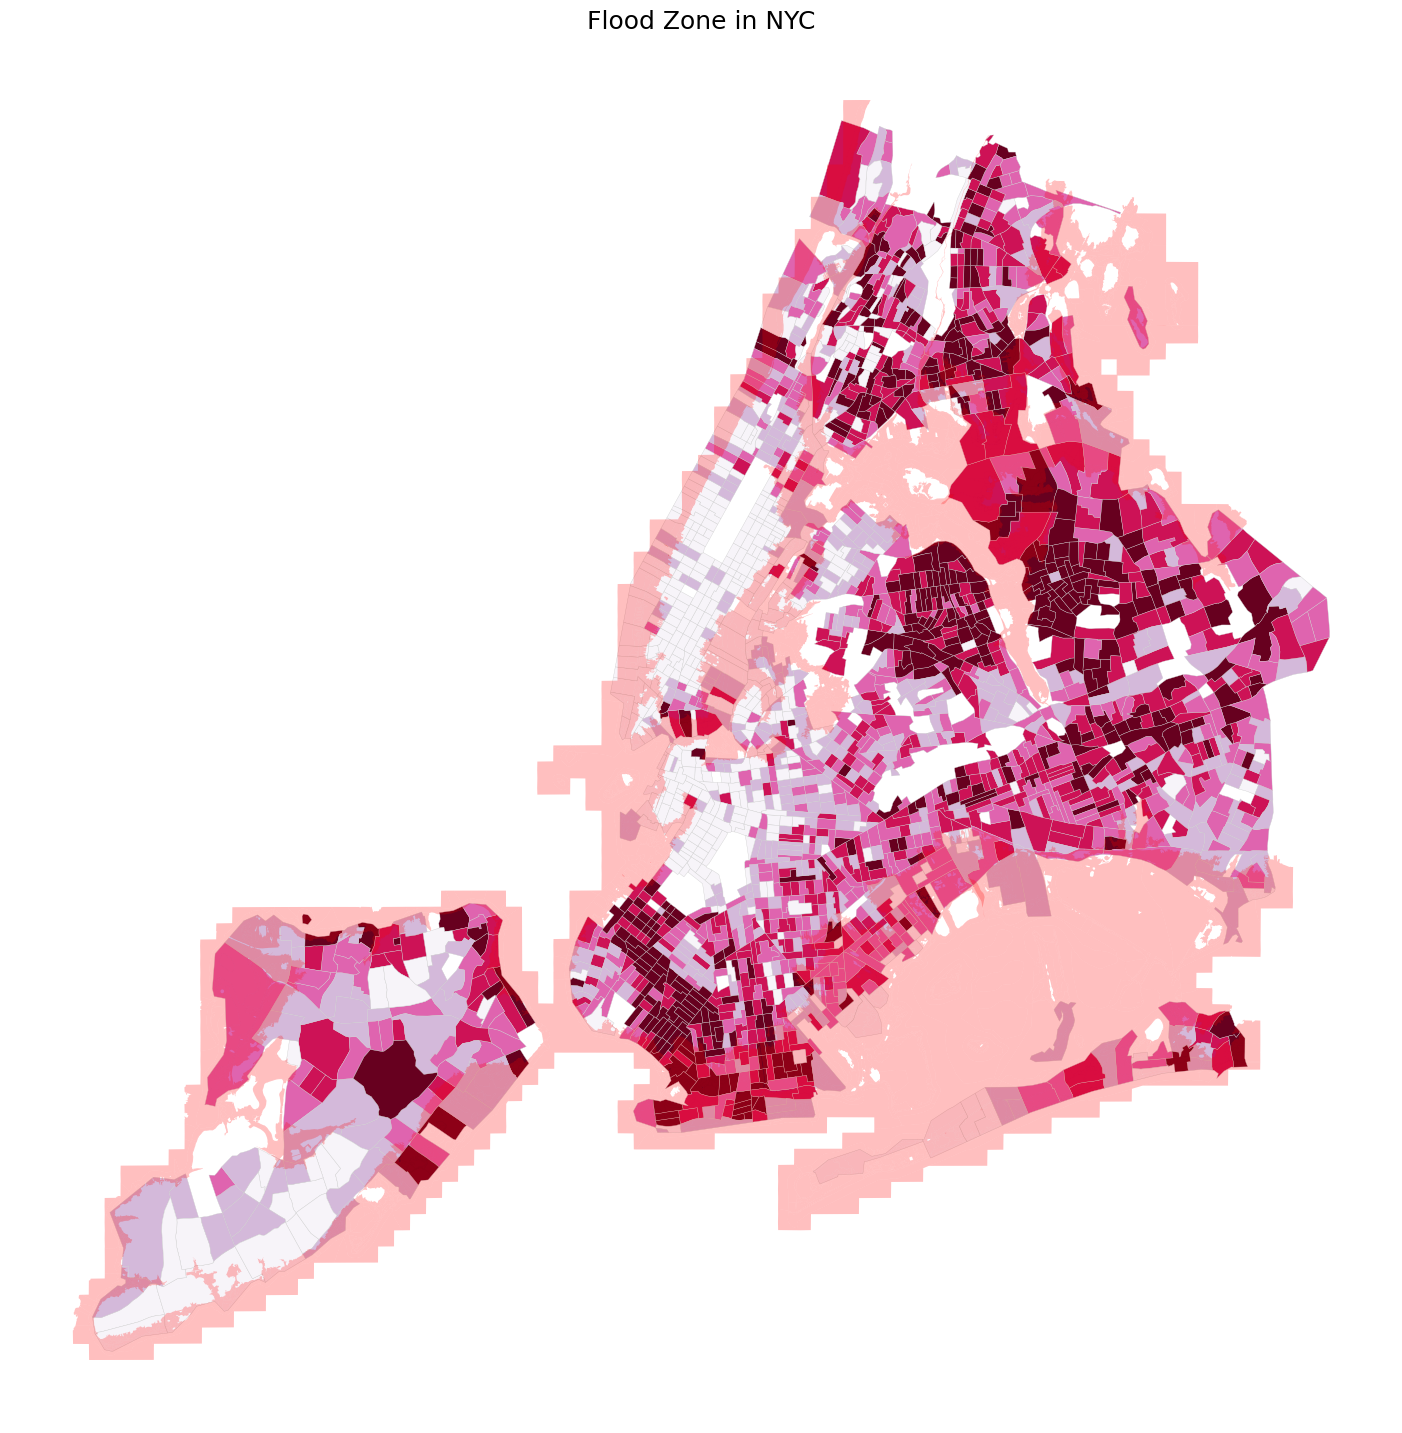

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming gdf and geojson_data are already defined and loaded

# Create the plot with a specific size
fig, ax = plt.subplots(figsize=(18, 18))

# Plot the base choropleth map
gdf.plot(column='FSHRI', cmap='PuRd', linewidth=0.25, ax=ax, edgecolor='0.8')

# Overlay the geojson_data with specified opacity
geojson_data.plot(ax=ax, color='red', alpha=0.25)

# Customize the plot
ax.set_xlabel('X-Coordinate', fontsize=14)
ax.set_ylabel('Y-Coordinate', fontsize=14)
ax.set_title('Flood Zone in NYC', fontsize=18)

# Turn off the axes
ax.axis('off')

# Show the plot
plt.show()


In [20]:
import geopandas as gpd
import folium
from folium import Choropleth

# Assuming gdf and geojson_data are already defined and loaded

# Convert gdf to GeoJSON format
gdf_json = gdf.to_json()

# Convert geojson_data to GeoJSON format
geojson_json = geojson_data.to_json()

# Create a folium map centered around the centroid of the gdf with Mapbox dark tiles
m = folium.Map(
    location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()],
    zoom_start=12,
    tiles='cartodbdark_matter'
)

# Add the gdf as a choropleth layer
Choropleth(
    geo_data=gdf_json,
    data=gdf,
    columns=['GEOID', 'FSHRI'],  # Use 'GEOID' and 'FSHRI' columns
    key_on='feature.properties.GEOID',  # Adjust key to match 'GEOID'
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(m)

# Add the geojson_data as a GeoJSON overlay with specified opacity
folium.GeoJson(
    geojson_json,
    name='geojson_data',
    style_function=lambda x: {'color': 'blue', 'opacity': 0.25}
).add_to(m)

# Add layer control to toggle the layers
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('map.html')


C:\Users\zheng\AppData\Local\Temp\ipykernel_49968\2127692770.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()],
